In [27]:
#Import necessary libraries for ML and Pre-Processing

!pip install feature-engine 
!pip install imbalanced-learn

from feature_engine.imputation import RandomSampleImputer


#Importing the necessary libraries for EDA and model building

import numpy as np 

import pandas as pd 

from sklearn import preprocessing

import matplotlib.pyplot as plt 

import seaborn as sns

import warnings

import time

warnings.simplefilter(action='ignore')



import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


#importing ML models from sklearn library

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import LogisticRegression



#Importing metrics functions from SK Learn

from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix



from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from pprint import pprint


# # Used for Downloading MNIST

# from sklearn.datasets import fetch_mldata



# Used for Splitting Training and Test Sets

from sklearn.model_selection import train_test_split



%matplotlib inline

In [28]:
df = pd.read_csv('bodyPerformance.csv')


# set random seed for reproducibility
np.random.seed(42)
df.duplicated().sum()

print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

df.rename(columns={"height_cm": "height", "weight_kg": "weight","body fat_%":"body_fat",
                   "sit and bend forward_cm":"sit_and_bend_forward","sit-ups counts":"sit-ups",
                   "broad jump_cm":"broad_jump","class":"performance"},inplace=True)



df.age = df.age.astype(int)

gender = {'F':0,'M':1}
df['gender'] =df['gender'].replace(gender)

df["BMI_val"]=round((df['weight']/(df['height'])/(df['height']))*10000,2)

def BMI (row):
    bmi = ((row.weight/row.height)/row.height)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 3
    
df['BMI'] = df.apply(BMI,axis=1)



Class = {'A':0, 'B':1, 'C':2, 'D':3}
df['class'] =df['performance'].replace(Class)




df = df[(df["body_fat"] <= 70)]
df = df[(df["sit_and_bend_forward"] <= 50)]
df = df[(df["broad_jump"] >0)]
df = df[df['diastolic'] < df['systolic']]
df = df[df['diastolic'] >=10]

df.drop(['height','weight','performance'],axis=1, inplace=True)

df["MAP"]=round((((2*df['diastolic'])+(df['systolic']))/3),2)
df.drop(['diastolic','systolic'],axis=1, inplace=True)


y = df['class']
df.drop(['class','BMI','diastolic','systolic'], axis=1, inplace=True)
X = df



with duplicates:(13393, 12)
without duplicates:(13392, 12)


In [29]:
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

train_feature.head()


,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val
415,25,1,20.5,54.7,28.5,38.0,217.0,26.23
9229,60,1,10.6,55.9,20.6,43.0,198.0,21.16
6124,63,1,22.8,33.3,24.2,30.0,191.0,24.87
10788,37,1,14.2,48.9,10.9,48.0,242.0,25.54
6532,46,1,16.5,58.5,15.4,46.0,225.0,24.45


# advanced analysis

In [19]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(alpha=1),
    'SVC': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'Multiple Logistic': LogisticRegression(solver='liblinear', multi_class='auto'),
    'KNN':KNeighborsClassifier(),
    'GausianNB':GaussianNB(),
    'Gradient Boost':GradientBoostingClassifier(criterion = "friedman_mse"),
    'Ridge': LogisticRegression(solver='saga', multi_class='multinomial',penalty='l2', C=1.0),
    'Lasso': LogisticRegression(solver='saga', multi_class='multinomial',penalty='l1', C=1),
    'Elastic-net':LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1, solver='saga', multi_class='multinomial')



}

for name, model in models.items():
    model.fit(train_feature, train_label)
    
    # Training set
    train_pred = model.predict(train_feature)
    train_acc = accuracy_score(train_label, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature)
    test_acc = accuracy_score(test_label, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    print(name)
    print('='*len(name))
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print('\n\n')


Random Forest
Training Accuracy: 1.0000
Training Error Rate: 0.0000
Training F1 Score: 1.0000
Training Confusion Matrix:
[[2699    0    0    0]
 [   0 2667    0    0]
 [   0    0 2693    0]
 [   0    0    0 2638]]


Test Accuracy: 0.7473
Test Error Rate: 0.2527
Test F1 Score: 0.7467
Test Confusion Matrix:
[[561  76   8   0]
 [153 400  94  29]
 [ 58 119 455  19]
 [  9  35  76 583]]



XGBoost
Training Accuracy: 0.9353
Training Error Rate: 0.0647
Training F1 Score: 0.9355
Training Confusion Matrix:
[[2672   25    2    0]
 [ 234 2399   29    5]
 [ 113  164 2416    0]
 [  22   41   57 2518]]


Test Accuracy: 0.7645
Test Error Rate: 0.2355
Test F1 Score: 0.7648
Test Confusion Matrix:
[[568  66  10   1]
 [154 430  75  17]
 [ 59 120 456  16]
 [ 11  37  64 591]]



SVC
===
Training Accuracy: 0.6033
Training Error Rate: 0.3967
Training F1 Score: 0.6035
Training Confusion Matrix:
[[2005  667   27    0]
 [ 767 1145  687   68]
 [ 344  580 1436  333]
 [  81  202  488 1867]]


Test Accuracy: 0.6135


# Randomized grid search cv

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
rf_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  max_features=grid_search.best_params_['max_features'])
rf_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = rf_best.score(train_feature, train_label)
test_acc = rf_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best cross-validation score:  0.7438540151088158
Training accuracy:  0.9818640740394503
Test accuracy:  0.7573831775700934


# bootstrap

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.base import clone


# Define the model with bootstrapping
model = RandomForestClassifier(n_estimators=200, 
                               max_features='log2', 
                               min_samples_leaf= 1,
                               min_samples_split= 6,
                               max_depth=30, 
                               random_state=42)

# Train the model with bootstrapping
n_bootstraps = 10
bootstrapped_models = []
for i in range(n_bootstraps):
    X_boot, y_boot = resample(train_feature, train_label, random_state=i)
    model_i = clone(model)
    model_i.fit(X_boot, y_boot)
    bootstrapped_models.append(model_i)

# Make predictions by averaging the bootstrapped models
y_pred = np.mean([model.predict(test_feature) for model in bootstrapped_models], axis=0)

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy and f1 score on train set
train_pred = np.mean([model.predict(train_feature) for model in bootstrapped_models], axis=0)
train_pred = np.round(train_pred)
train_pred[train_pred < 0.5] = 0
train_pred[train_pred >= 0.5] = 1
train_acc = accuracy_score(train_label, train_pred)
train_f1 = f1_score(train_label, train_pred, average='weighted')

# Calculate accuracy and f1 score on test set
test_pred = np.mean([model.predict(test_feature) for model in bootstrapped_models], axis=0)
test_pred = np.round(test_pred)
test_pred[test_pred < 0.5] = 0
test_pred[test_pred >= 0.5] = 1
test_acc = accuracy_score(test_label, test_pred)
test_f1 = f1_score(test_label, test_pred, average='weighted')

print("Train accuracy:", train_acc)
print("Train F1 score:", train_f1)
print("Test accuracy:", test_acc)
print("Test F1 score:", test_f1)



Train accuracy: 0.48050855380013086
Train F1 score: 0.3595492688860346
Test accuracy: 0.40710280373831775
Test F1 score: 0.2942632768948834


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid to search over
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = grid_search = RandomizedSearchCV(estimator=lda, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
lda_best = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], 
                                      shrinkage=grid_search.best_params_['shrinkage'], 
                                      n_components=grid_search.best_params_['n_components'])
lda_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = lda_best.score(train_feature, train_label)
test_acc = lda_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'solver': 'svd', 'shrinkage': None, 'n_components': None}
Best cross-validation score:  0.609610919592962
Training accuracy:  0.6127886323268206
Test accuracy:  0.6145794392523365


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                                 weights=grid_search.best_params_['weights'], 
                                 p=grid_search.best_params_['p'])
knn_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = knn_best.score(train_feature, train_label)
test_acc = knn_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
Best cross-validation score:  0.6359735311723096
Training accuracy:  1.0
Test accuracy:  0.6497196261682243


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'warm_start': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 15],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'loss': ['deviance', 'exponential']
}


# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
gb_best = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                      max_depth=grid_search.best_params_['max_depth'], 
                                      learning_rate=grid_search.best_params_['learning_rate'],
                                     subsample= grid_search.best_params_['subsample'],
                                     min_samples_split= grid_search.best_params_['min_samples_split'],
                                     min_samples_leaf =grid_search.best_params_['min_samples_leaf'] ,
                                     max_features =grid_search.best_params_['max_features'] ,
                                     warm_start = grid_search.best_params_['warm_start'] ,
                                   tol = grid_search.best_params_['tol'] ,
                                   validation_fraction = grid_search.best_params_['validation_fraction'] ,
                                   n_iter_no_change = grid_search.best_params_['n_iter_no_change'] ,
                                   ccp_alpha = grid_search.best_params_['ccp_alpha'] ,
                                   loss = grid_search.best_params_['loss'] ,
                                     random_state =grid_search.best_params_['random_state'] 
                                    )
gb_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = gb_best.score(train_feature, train_label)
test_acc = gb_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'warm_start': False, 'validation_fraction': 0.2, 'tol': 0.0001, 'subsample': 1.0, 'random_state': 42, 'n_iter_no_change': 5, 'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.05, 'ccp_alpha': 0.0}
Best cross-validation score:  0.736842353619693
Training accuracy:  0.8637935869870057
Test accuracy:  0.760373831775701


In [ ]:
#Fitting the Final Choosen model and getting the Confusion Matrix

#using the best hyperparameters obtained from the random search 
#and making predictions on the test set.

In [31]:
from sklearn.metrics import confusion_matrix

lda_best.fit(train_feature, train_label)
lda_best_predict = lda_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, lda_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, lda_best_predict))

=== Confusion Matrix ===
[[485 146  14   0]
 [189 272 198  17]
 [ 57 136 380  78]
 [ 10  48 138 507]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       645
           1       0.45      0.40      0.43       676
           2       0.52      0.58      0.55       651
           3       0.84      0.72      0.78       703

    accuracy                           0.61      2675
   macro avg       0.62      0.61      0.61      2675
weighted avg       0.62      0.61      0.61      2675



In [20]:
from sklearn.metrics import confusion_matrix

rf_best.fit(train_feature, train_label)
rf_best_predict = rf_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, rf_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, rf_best_predict))

=== Confusion Matrix ===
[[568  68   9   0]
 [152 422  78  24]
 [ 54 130 448  19]
 [ 10  40  75 578]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       645
           1       0.64      0.62      0.63       676
           2       0.73      0.69      0.71       651
           3       0.93      0.82      0.87       703

    accuracy                           0.75      2675
   macro avg       0.76      0.75      0.75      2675
weighted avg       0.76      0.75      0.75      2675



In [6]:
from sklearn.metrics import confusion_matrix

gb_best.fit(train_feature, train_label)
gb_best_predict = gb_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, gb_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, gb_best_predict))

=== Confusion Matrix ===
[[570  69   4   2]
 [154 423  80  19]
 [ 54 130 453  14]
 [  9  36  70 588]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.88      0.80       645
           1       0.64      0.63      0.63       676
           2       0.75      0.70      0.72       651
           3       0.94      0.84      0.89       703

    accuracy                           0.76      2675
   macro avg       0.76      0.76      0.76      2675
weighted avg       0.77      0.76      0.76      2675



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = lda_best.score(train_feature, train_label)
test_acc = lda_best.score(test_feature, test_label)

print('lda')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = lda_best.predict(train_feature)
test_preds = lda_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
lda_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets
print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


lda
Training accuracy:  0.6127886323268206
Training precision:  0.6162585077616163
Training recall:  0.6128764540801152
Training f1-score:  0.6135091652548037
Training error rate:  0.38721136767317943
Training sensitivity:  0.6276889134031991
Training specificity:  0.7431261770244821
Training time:  0.6829712390899658


Test accuracy:  0.6145794392523365
Test precision:  0.6172721991097773
Test recall:  0.6148042713504929
Test f1-score:  0.6132145366656858
Test error rate:  0.3854205607476635
Test sensitivity:  0.5900216919739696
Test specificity:  0.768621236133122


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = gb_best.score(train_feature, train_label)
test_acc = gb_best.score(test_feature, test_label)

print('gb')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = gb_best.predict(train_feature)
test_preds = gb_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
gb_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets
print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


gb
Training accuracy:  0.8637935869870057
Training precision:  0.8699223340254074
Training recall:  0.8638041320038592
Training f1-score:  0.864396511984961
Training error rate:  0.1362064130129943
Training sensitivity:  0.8428798727128083
Training specificity:  0.9527529761904762
Training time:  57.765676498413086


Test accuracy:  0.760373831775701
Test precision:  0.7643099976070579
Test recall:  0.7604321181240842
Test f1-score:  0.7593352252722986
Test error rate:  0.23962616822429905
Test sensitivity:  0.733102253032929
Test specificity:  0.892018779342723


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = rf_best.score(train_feature, train_label)
test_acc = rf_best.score(test_feature, test_label)

print('rf')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = rf_best.predict(train_feature)
test_preds = rf_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
rf_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets
print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


rf
Training accuracy:  0.9811162008039638
Training precision:  0.9817041912688794
Training recall:  0.9810553853368278
Training f1-score:  0.9811899923351792
Training error rate:  0.01888379919603622
Training sensitivity:  0.9782118707738543
Training specificity:  0.9996294924045943
Training time:  25.623682737350464


Test accuracy:  0.7536448598130842
Test precision:  0.7572667021552064
Test recall:  0.7538107911858485
Test f1-score:  0.7525892514359935
Test error rate:  0.24635514018691584
Test sensitivity:  0.735191637630662
Test specificity:  0.8930817610062893


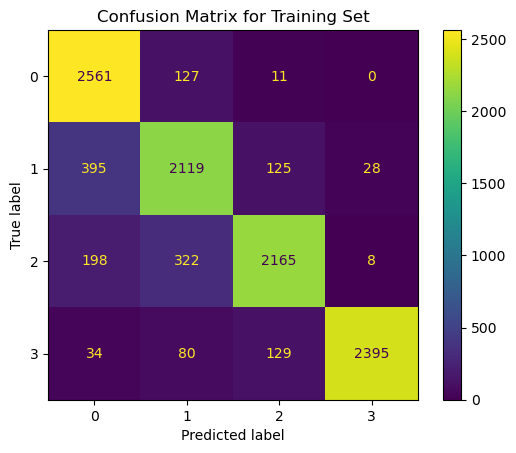

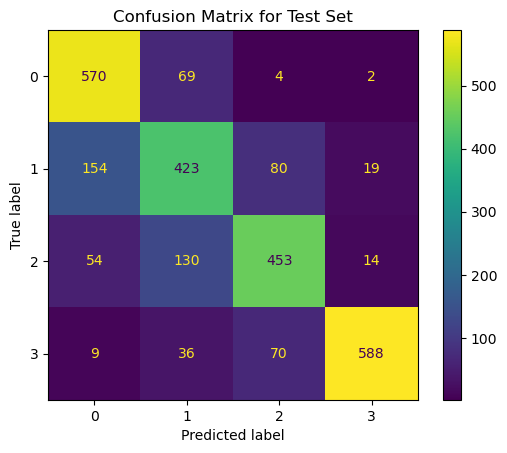

In [16]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

model =gb_best
model.fit(train_feature, train_label)

# Confusion matrix for the training set
predicted_train = model.predict(train_feature)
cm_train = metrics.confusion_matrix(train_label, predicted_train)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1,2,3])
cm_display_train.plot()
plt.title('Confusion Matrix for Training Set')
plt.show()

# Confusion matrix for the test set
predicted_test = model.predict(test_feature)
cm_test = metrics.confusion_matrix(test_label, predicted_test)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1,2,3])
cm_display_test.plot()
plt.title('Confusion Matrix for Test Set')
plt.show()

# best hyperparameters for whole data set

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'warm_start': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 15],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'loss': ['deviance', 'exponential']
}


# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(X,y)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
gb_best = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                      max_depth=grid_search.best_params_['max_depth'], 
                                      learning_rate=grid_search.best_params_['learning_rate'],
                                     subsample= grid_search.best_params_['subsample'],
                                     min_samples_split= grid_search.best_params_['min_samples_split'],
                                     min_samples_leaf =grid_search.best_params_['min_samples_leaf'] ,
                                     max_features =grid_search.best_params_['max_features'] ,
                                     warm_start = grid_search.best_params_['warm_start'] ,
                                   tol = grid_search.best_params_['tol'] ,
                                   validation_fraction = grid_search.best_params_['validation_fraction'] ,
                                   n_iter_no_change = grid_search.best_params_['n_iter_no_change'] ,
                                   ccp_alpha = grid_search.best_params_['ccp_alpha'] ,
                                   loss = grid_search.best_params_['loss'] ,
                                     random_state =grid_search.best_params_['random_state'] 
                                    )

Best hyperparameters:  {'warm_start': False, 'validation_fraction': 0.2, 'tol': 0.0001, 'subsample': 1.0, 'random_state': 42, 'n_iter_no_change': 5, 'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.05, 'ccp_alpha': 0.0}
Best cross-validation score:  0.7440929406748265
